In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

chembl = pd.read_csv('../data/indication_gene_link/chembl_chembl_2.csv') 
drugbank_dgidb = pd.read_csv('../data/indication_gene_link/drugbank_dgidb.csv') 
drugbank_stitch = pd.read_csv('../data/indication_gene_link/STITCH_drugbank.csv')
ruiz_dgidb = pd.read_csv('../data/indication_gene_link/ruiz_dgidb.csv') 
ruiz_stitch = pd.read_csv('../data/indication_gene_link/STITCH_Ruiz.csv')

ensembl_voc = pd.read_csv('../data/Ensembl_transcript_peptide_HGNC.tsv', sep='\t') 

partition = pd.read_csv('../data/partition.csv', sep=',') 
partition = partition[['Gene','CellType','Individual']]
tissue = pd.read_csv('../data/GTEx_tissue_variance.csv') 
tissue = tissue[['Name','Variation']]
tissue.head()

,Name,Variation
0,ENSG00000223972,0.000013
1,ENSG00000227232,0.038660
2,ENSG00000278267,0.000000
3,ENSG00000243485,0.000003
4,ENSG00000237613,0.000000


In [55]:
#Chembl
chembl_merged = chembl.merge(ensembl_voc, left_on='EnsemblID', right_on='ensembl_gene_id', how ='inner')
chembl_merged = chembl_merged[['Parent Molecule Name', 'Disease', 'ensembl_gene_id', 'hgnc_symbol']]
chembl_merged = chembl_merged.merge(partition, left_on='hgnc_symbol', right_on='Gene', how ='inner')
chembl_merged = chembl_merged.merge(tissue, left_on='ensembl_gene_id', right_on='Name', how ='inner')
chembl_merged = chembl_merged.drop(['Name', 'hgnc_symbol', 'ensembl_gene_id'], axis=1)
chembl_merged = chembl_merged.rename(columns={'Parent Molecule Name': 'Drug_id', 'Gene': 'Gene_name','Variation': 'Tissue'})
chembl_merged = chembl_merged.drop_duplicates(subset=['Drug_id', 'Disease','Gene_name'])
chembl_merged.head()

,Drug_id,Disease,Gene_name,CellType,Individual,Tissue
0,PHENYLEPHRINE,Post Traumatic Stress Disorder,ADRA1B,0.877555,0.018433,0.111013
1,DOXAZOSIN,Post Traumatic Stress Disorder,ADRA1B,0.877555,0.018433,0.111013
2,DOXAZOSIN,Substance Use Disorders,ADRA1B,0.877555,0.018433,0.111013
3,CARVEDILOL,Post Traumatic Stress Disorder,ADRA1B,0.877555,0.018433,0.111013
4,SERTINDOLE,Schizophrenia,ADRA1B,0.877555,0.018433,0.111013


In [56]:
#drugbank_dgidb
drugbank_dgidb_merged = drugbank_dgidb.merge(partition, left_on='gene_name', right_on='Gene', how ='inner')
drugbank_dgidb_merged = drugbank_dgidb_merged.merge(ensembl_voc, left_on='gene_name', right_on='hgnc_symbol', how ='inner')
drugbank_dgidb_merged = drugbank_dgidb_merged.merge(tissue, left_on='ensembl_gene_id', right_on='Name', how ='inner')
drugbank_dgidb_merged = drugbank_dgidb_merged.drop(['gene_name','ChEMBL_ID','Indication','Name','ensembl_gene_id','ensembl_peptide_id','hgnc_symbol'], axis=1)
drugbank_dgidb_merged = drugbank_dgidb_merged.rename(columns={'DrugBank_ID': 'Drug_id', 'Gene': 'Gene_name','Variation':'Tissue'})
drugbank_dgidb_merged.drop_duplicates(subset=['Drug_id', 'Disease','Gene_name'])
drugbank_dgidb_merged.head()

,Drug_id,Disease,Gene_name,CellType,Individual,Tissue
0,DB00543,Anxiety Disorder,DRD1,0.570734,0.054332,0.111757
1,DB00668,Eating Disorders,DRD1,0.570734,0.054332,0.111757
2,DB00477,Attention Deficit Hyperactivity Disorder,DRD1,0.570734,0.054332,0.111757
3,DB00726,Anxiety Disorder,DRD1,0.570734,0.054332,0.111757
4,DB00433,Anxiety Disorder,DRD1,0.570734,0.054332,0.111757


In [57]:
#drugbank_stitch
drugbank_stitch_merged = drugbank_stitch.merge(partition, left_on='hgnc_symbol', right_on='Gene', how ='inner')
drugbank_stitch_merged = drugbank_stitch_merged.merge(tissue, left_on='ensembl_gene_id', right_on='Name', how ='inner')
drugbank_stitch_merged = drugbank_stitch_merged.drop(['Generic Name','Indication','ensembl_gene_id','hgnc_symbol','ensembl_peptide_id','Name'], axis=1)
drugbank_stitch_merged = drugbank_stitch_merged.rename(columns={'DrugBank ID': 'Drug_id', 'Gene': 'Gene_name','Variation':'Tissue'})
drugbank_stitch_merged = drugbank_stitch_merged.drop_duplicates(subset=['Drug_id', 'Disease', 'Gene_name'])
drugbank_stitch_merged.head()

,Drug_id,Disease,Gene_name,CellType,Individual,Tissue
0,DB00118,Major Depressive Disorder,CYP2E1,0.489305,0.146499,0.510118
1,DB00132,Eating Disorders,CYP2E1,0.489305,0.146499,0.510118
2,DB00477,Attention Deficit Hyperactivity Disorder,CYP2E1,0.489305,0.146499,0.510118
3,DB00679,Anxiety Disorder,CYP2E1,0.489305,0.146499,0.510118
4,DB01151,Attention Deficit Hyperactivity Disorder,CYP2E1,0.489305,0.146499,0.510118


In [58]:
#ruiz_dgidb
ruiz_dgidb_merged = ruiz_dgidb.merge(partition, left_on='gene_name', right_on='Gene', how ='inner')
ruiz_dgidb_merged = ruiz_dgidb_merged.merge(ensembl_voc, left_on='gene_name', right_on='hgnc_symbol', how ='inner')
ruiz_dgidb_merged = ruiz_dgidb_merged.merge(tissue, left_on='ensembl_gene_id', right_on='Name', how ='inner')
ruiz_dgidb_merged = ruiz_dgidb_merged.drop(['indication','indication_name','db_name','gene_name','gene_claim_name', 'Name', 'ensembl_gene_id', 'ensembl_peptide_id', 'hgnc_symbol'], axis=1)
ruiz_dgidb_merged = ruiz_dgidb_merged.rename(columns={'drugbank_id': 'Drug_id', 'Gene': 'Gene_name', 'Variation':'Tissue'})
ruiz_dgidb_merged.drop_duplicates(subset=['Drug_id', 'Disease','Gene_name'])
ruiz_dgidb_merged.head()

,Disease,Drug_id,Gene_name,CellType,Individual,Tissue
0,Alzheimer’s Disease,CHEMBL47,CCND1,0.652892,0.002289,0.272565
1,Alzheimer’s Disease,CHEMBL47,CCND1,0.652892,0.002289,0.272565
2,Alzheimer’s Disease,CHEMBL47,CCND1,0.652892,0.002289,0.272565
3,Alzheimer’s Disease,CHEMBL47,CCND1,0.652892,0.002289,0.272565
4,Alzheimer’s Disease,CHEMBL47,CCND1,0.652892,0.002289,0.272565


In [59]:
#ruiz_stitch
ruiz_stitch_merged = ruiz_stitch.merge(partition, left_on='hgnc_symbol', right_on='Gene', how ='inner')
ruiz_stitch_merged = ruiz_stitch_merged.merge(tissue, left_on='ensembl_gene_id', right_on='Name', how ='inner')
ruiz_stitch_merged = ruiz_stitch_merged.drop(['drug_name','indication_name','ensembl_gene_id','hgnc_symbol','Name'], axis=1)
ruiz_stitch_merged = ruiz_stitch_merged.rename(columns={'drug': 'Drug_id', 'Gene': 'Gene_name','Variation':'Tissue'})
ruiz_stitch_merged = ruiz_stitch_merged.drop_duplicates(subset=['Drug_id', 'Disease', 'Gene_name'])
ruiz_stitch_merged.head()

,Drug_id,Disease,Gene_name,CellType,Individual,Tissue
0,DB00130,Anxiety Disorder,IFT57,0.732873,0.067486,0.216113
1,DB00163,Alzheimer’s Disease,TGFB1,0.792506,0.012390,0.321394
2,DB00163,Alzheimer’s Disease,SCARB2,0.807902,0.025301,0.242865
3,DB00176,OCD & Tourette Syndrome,FOS,0.115484,0.228114,0.470069
4,DB00182,Attention Deficit Hyperactivity Disorder,FOS,0.115484,0.228114,0.470069


In [60]:
dataframes = {
    'chembl_merged': chembl_merged,
    'drugbank_dgidb_merged': drugbank_dgidb_merged,
    'drugbank_stitch_merged': drugbank_stitch_merged,
    'ruiz_dgidb_merged': ruiz_dgidb_merged,
    'ruiz_stitch_merged': ruiz_stitch_merged
}

disease_color_mapping = {
    "Attention Deficit Hyperactivity Disorder": "sienna",
    "Alzheimer’s Disease": "skyblue",
    "Anxiety Disorder": "lightgreen",
    "Autism Spectrum Disorder": "gold",
    "Bipolar Disorder": "coral",
    "Eating Disorders": "plum",
    "Major Depressive Disorder": "darkkhaki",
    "OCD & Tourette Syndrome": "salmon",
    "Post Traumatic Stress Disorder": "steelblue",
    "Schizophrenia": "sandybrown",
    "Substance Use Disorders": "orchid"
}

all_diseases = list(disease_color_mapping.keys())

In [61]:
disease_order = [
    "Attention Deficit Hyperactivity Disorder",
    "Alzheimer’s Disease",
    "Anxiety Disorder",
    "Autism Spectrum Disorder",
    "Bipolar Disorder",
    "Eating Disorders",
    "Major Depressive Disorder",
    "OCD & Tourette Syndrome",
    "Post Traumatic Stress Disorder",
    "Schizophrenia",
    "Substance Use Disorders"
]


In [62]:
summary_df = pd.DataFrame(columns=['Database', 'Total Rows'] + disease_order)
unique_pairs_counts = []

for name, df in dataframes.items():
    total_rows = len(df)
    disease_counts = {disease: 0 for disease in disease_order}
    unique_pairs_dict = {disease: 0 for disease in disease_order}
    
    for disease in disease_order:
        disease_counts[disease] = df[df['Disease'] == disease].shape[0]
        unique_pairs_dict[disease] = df[df['Disease'] == disease]['Drug_id'].nunique()

    summary_info = [name, total_rows] + list(disease_counts.values())
    summary_df.loc[len(summary_df)] = summary_info
    unique_pairs_counts.append([name] + list(unique_pairs_dict.values()))

unique_pairs_df = pd.DataFrame(unique_pairs_counts, columns=['Database'] + disease_order)
unique_pairs_df.set_index('Database', inplace=True)
summary_df.set_index('Database', inplace=True)

print("Total Rows and Disease Counts:")
print(summary_df)
print("\nUnique Drug-Disease Pairs:")
print(unique_pairs_df)


Total Rows and Disease Counts:
                        Total Rows  Attention Deficit Hyperactivity Disorder  \
Database                                                                       
chembl_merged                  174                                         4   
drugbank_dgidb_merged          559                                        88   
drugbank_stitch_merged         346                                        54   
ruiz_dgidb_merged             3514                                       173   
ruiz_stitch_merged             369                                        32   

                        Alzheimer’s Disease  Anxiety Disorder  \
Database                                                        
chembl_merged                            16                22   
drugbank_dgidb_merged                    58               135   
drugbank_stitch_merged                   19                45   
ruiz_dgidb_merged                       227               399   
ruiz_stitch_merged

TypeError: 'other' must be an instance of matplotlib.axes._base._AxesBase, not a bool

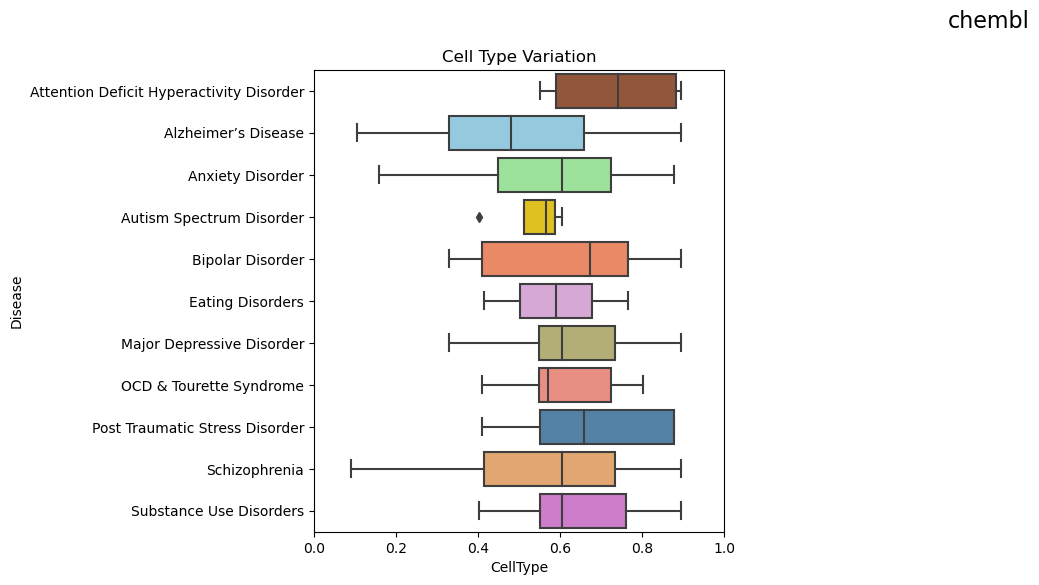

In [64]:
for database_name, df in dataframes.items():
    plt.figure(figsize=(10,6))
    plt.suptitle(database_name.replace('_merged', ''), fontsize=16)

    plt.subplot(1, 2, 1)
    sns.boxplot(
        y='Disease', x='CellType', data=df, 
        order=disease_order, 
        palette=disease_color_mapping
    )
    plt.title(f'Cell Type Variation')
    plt.xlabel('Disease')
    
    plt.xlim(0, 1)

    plt.subplot(1, 2, 2)
    sns.boxplot(
        y='Disease', x='Individual', data=df, 
        order=disease_order,
        palette=disease_color_mapping
    )
    plt.title(f'Individual Variation')
    plt.xlabel('Disease')
    
    for disease in disease_order:
        count = len(df[df['Disease'] == disease])
        plt.text(1.02, disease_order.index(disease), f'(n={count})', va='center', fontsize=10)
    
    plt.xlim(0, 1)
    
    plt.yticks([])

    plt.tight_layout()
    plt.show()
